In [20]:
suppressWarnings(require('pkgmaker',quietly = T))
require('plyr',quietly = T)
l_ply(c('dplyr',
        'plotly',
        'data.table',
        'jsonlite', 
        'rjson',
        'httr',
        'tidyr',  
        'reshape2',
        'factoextra',
        'kableExtra',
        'parallel',
        'doParallel',
        'scales',
        'StatMatch',
        'lattice',
        'utils',
        'missMDA',
        'RMariaDB',
        'pacman',
        'parmigene',
        'matrixTests',
        'hablar',
        'tibble'), function(pkg) {
          invisible(capture.output(irequire(pkg, quiet = T, autoinstall = T)))
        })

### Example data

In [5]:
url <- "https://ftp.ebi.ac.uk/pride-archive/2016/06/PXD004163/Yan_miR_Protein_table.flatprottable.txt"
download.file(url, destfile = "./miR_Proteintable.txt",method= "auto")

df.prot = read.table("miR_Proteintable.txt",stringsAsFactors = FALSE,
                     header = TRUE, quote = "", comment.char = "",sep = "\t")
head(df.prot)

Protein.accession,Gene,Associated.gene.ID,Description,Coverage,X..Proteins,Proteins.in.group,miR.FASP_..Unique.peptides,miR.FASP_..Peptides,miR.FASP_..PSMs,...,miR.FASP_tmt10plex_129N,miR.FASP_tmt10plex_129N.....quanted.PSMs,miR.FASP_tmt10plex_129C,miR.FASP_tmt10plex_129C.....quanted.PSMs,miR.FASP_tmt10plex_130N,miR.FASP_tmt10plex_130N.....quanted.PSMs,miR.FASP_tmt10plex_130C,miR.FASP_tmt10plex_130C.....quanted.PSMs,miR.FASP_tmt10plex_131,miR.FASP_tmt10plex_131.....quanted.PSMs
A2M,NA,ENSG00000175899,alpha-2-macroglobulin [Source:HGNC Symbol;Acc:HGNC:7],NA,na,NA,8,9,12,...,0.8269960,11,0.7601787,11,0.9170174,11,0.8545436,11,0.6034764,11
A2ML1,NA,ENSG00000166535,alpha-2-macroglobulin-like 1 [Source:HGNC Symbol;Acc:HGNC:23336],NA,na,NA,1,1,1,...,0.9976961,1,1.2686841,1,1.1331769,1,1.3361156,1,1.1255814,1
AAAS,NA,ENSG00000094914,"achalasia, adrenocortical insufficiency, alacrimia [Source:HGNC Symbol;Acc:HGNC:13666]",NA,na,NA,6,6,11,...,0.8474254,11,0.9044735,11,1.1462708,11,0.9201587,11,1.0190892,11
AACS,NA,ENSG00000081760,acetoacetyl-CoA synthetase [Source:HGNC Symbol;Acc:HGNC:21298],NA,na,NA,10,10,14,...,0.8878470,14,1.0020848,14,1.0606251,14,0.9536617,14,0.9506161,14
AAED1,NA,ENSG00000158122,AhpC/TSA antioxidant enzyme domain containing 1 [Source:HGNC Symbol;Acc:HGNC:16881],NA,na,NA,2,2,4,...,1.0751808,4,1.0296678,4,1.0646601,4,1.0366690,4,1.2450713,4
AAGAB,NA,ENSG00000103591,alpha- and gamma-adaptin binding protein [Source:HGNC Symbol;Acc:HGNC:25662],NA,na,NA,5,5,10,...,1.0637393,10,0.9120212,10,0.9120529,10,1.0656559,10,1.0849826,10


In [7]:
TMT_columns = seq(15,33,2)
dat = df.prot[df.prot$miR.FASP_q.value<0.01,TMT_columns]
rownames(dat) = df.prot[df.prot$miR.FASP_q.value<0.01,]$Protein.accession
head(dat)

,miR.FASP_tmt10plex_126,miR.FASP_tmt10plex_127N,miR.FASP_tmt10plex_127C,miR.FASP_tmt10plex_128N,miR.FASP_tmt10plex_128C,miR.FASP_tmt10plex_129N,miR.FASP_tmt10plex_129C,miR.FASP_tmt10plex_130N,miR.FASP_tmt10plex_130C,miR.FASP_tmt10plex_131
A2M,0.9308308,0.7720215,0.7079040,0.7893872,1.1513714,0.8269960,0.7601787,0.9170174,0.8545436,0.6034764
AAAS,0.9154370,0.9168362,0.9416988,0.8854413,0.9657291,0.8474254,0.9044735,1.1462708,0.9201587,1.0190892
AACS,0.9624553,0.9475909,1.0197705,0.9642000,0.9636909,0.8878470,1.0020848,1.0606251,0.9536617,0.9506161
AAED1,0.9005087,1.1075107,1.3104121,1.1152721,1.0145061,1.0751808,1.0296678,1.0646601,1.0366690,1.2450713
AAGAB,1.0723010,1.2126029,0.9937780,1.0576297,1.0151150,1.0637393,0.9120212,0.9120529,1.0656559,1.0849826
AAK1,1.0135083,0.9843319,1.0279736,1.1490864,0.9867356,1.0346318,1.1678986,1.0293387,0.9911412,0.9885753


In [14]:
min(dat, na.rm = TRUE)

[1] 0.1501698

In [15]:
max(dat, na.rm = TRUE)

[1] 23.69688

In [36]:
head(log2(dat))

,miR.FASP_tmt10plex_126,miR.FASP_tmt10plex_127N,miR.FASP_tmt10plex_127C,miR.FASP_tmt10plex_128N,miR.FASP_tmt10plex_128C,miR.FASP_tmt10plex_129N,miR.FASP_tmt10plex_129C,miR.FASP_tmt10plex_130N,miR.FASP_tmt10plex_130C,miR.FASP_tmt10plex_131
A2M,-0.10340914,-0.37328713,-0.498374390,-0.34119498,0.20335333,-0.27404766,-0.395589431,-0.12497904,-0.22677394,-0.72863073
AAAS,-0.12746751,-0.12526409,-0.086662344,-0.17553136,-0.05030950,-0.23884168,-0.144849896,0.19694791,-0.12004537,0.02728034
AACS,-0.05520861,-0.07766382,0.028244565,-0.05259564,-0.05335765,-0.17161705,0.003004548,0.08491477,-0.06845053,-0.07306531
AAED1,-0.15118791,0.14732059,0.390020631,0.15739570,0.02077757,0.10457931,0.042179010,0.09039291,0.05195533,0.31622842
AAGAB,0.10070996,0.27810723,-0.009004492,0.08083462,0.02164324,0.08914456,-0.132860797,-0.13281066,0.09174168,0.11767192
AAK1,0.01935792,-0.02278320,0.039803214,0.20048734,-0.01926449,0.04911741,0.223915045,0.04171772,-0.01283751,-0.01657716


In [51]:
min(log2(dat), na.rm = TRUE)

[1] -2.735333

### Data from Art

Missing values in proteomic data can be generally characterized into missing at random (MAR) and missing not at random (MNAR)2,3. 
+ MAR missing values mostly result from technical limitations and stochastic fluctuations in an abundance-independent manner.
+ MNAR missing values are more abundance-dependent that can be explained by the measurability of the corresponding peptides. 

Missing values in proteomic data are a mixture of MAR and MNAR. Although the real proportion is difficult to determine, it is believed that MNAR plays a dominant role in producing missing values.

In [52]:
intensity <- read.csv("../proteomics/data/Protein_intensity.csv") %>% 
    filter(Intensity > -3.0)

In [39]:
head(intensity, 2)
print(dim(intensity))

id,Protein,ProteinGroup,ProteinGroupName,ProteinGroupId,Organism,Sample,Intensity,counts,hgnc_symbol
45243,sp|A0A087WV62|TVB16_HUMAN,sp|A0A087WV62|TVB16_HUMAN,TVB16_HUMAN,A0A087WV62,NULL,CTG-0158,15.503,NULL,NULL
45244,sp|A0A087WV62|TVB16_HUMAN,sp|A0A087WV62|TVB16_HUMAN,TVB16_HUMAN,A0A087WV62,NULL,CTG-0159,14.932,NULL,NULL


[1] 1330824      10


In [53]:
head(intensity, 2)
print(dim(intensity))

id,Protein,ProteinGroup,ProteinGroupName,ProteinGroupId,Organism,Sample,Intensity,counts,hgnc_symbol
45243,sp|A0A087WV62|TVB16_HUMAN,sp|A0A087WV62|TVB16_HUMAN,TVB16_HUMAN,A0A087WV62,NULL,CTG-0158,15.503,NULL,NULL
45244,sp|A0A087WV62|TVB16_HUMAN,sp|A0A087WV62|TVB16_HUMAN,TVB16_HUMAN,A0A087WV62,NULL,CTG-0159,14.932,NULL,NULL


[1] 1330754      10


In [25]:
x <- intensity[intensity$Protein=='sp|A0A0B4J2D5|GAL3B_HUMAN',]
x[x$Sample=='CTG-0158',]

,id,Protein,ProteinGroup,ProteinGroupName,ProteinGroupId,Organism,Sample,Intensity,counts,hgnc_symbol
114,45356,sp|A0A0B4J2D5|GAL3B_HUMAN,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN,GAL3B_HUMAN,A0A0B4J2D5,NULL,CTG-0158,18.058,NULL,NULL
110184,155426,sp|A0A0B4J2D5|GAL3B_HUMAN,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN,GAL3A_HUMAN,P0DPI2,NULL,CTG-0158,18.058,NULL,NULL


In [54]:
int_mtx <- intensity %>% 
    select(c('Protein', 'Sample', 'Intensity'))  %>% 
    pivot_wider(names_from = Sample, values_from = Intensity, values_fn = mean) %>% 
#     pivot_wider(names_from = Sample, values_from = Intensity) %>% 
    column_to_rownames('Protein')
head(int_mtx)
print(dim(int_mtx))

,CTG-0158,CTG-0159,CTG-0160,CTG-0162,CTG-0163,CTG-0166,CTG-0167,CTG-0178,CTG-0184,CTG-0464,...,CTG-3794,CTG-3795,CTG-3796,CTG-3797,CTG-3799,CTG-3800,CTG-3801,CTG-3802,CTG-3803,CTG-3805
sp|A0A087WV62|TVB16_HUMAN,15.503,14.932,14.791,15.616,15.860,15.620,14.404,17.208,15.961,14.648,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0A0B4J2D5|GAL3B_HUMAN,18.058,15.959,16.403,16.609,17.808,17.707,16.961,17.071,16.576,17.171,...,19.154,18.021,18.640,17.470,19.184,18.883,19.659,19.406,18.087,19.928
sp|A0A0B4J2H0|HV69D_HUMAN,NA,NA,NA,NA,NA,NA,NA,NA,14.146,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0A0C4DH25|KVD20_HUMAN,NA,NA,NA,11.443,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0A0U1RRE5|NBDY_HUMAN,13.970,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,14.185,14.753,14.812,NA,15.659,15.389,14.616,14.346,14.881
sp|A0A0U1RRL7|MMPOS_HUMAN,NA,16.280,NA,16.074,NA,NA,NA,15.504,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 8501  317


In [31]:
x <- intensity[intensity$Protein=='sp|A0A0B4J2H0|HV69D_HUMAN',]
x[x$Sample=='CTG-0158',]

id,Protein,ProteinGroup,ProteinGroupName,ProteinGroupId,Organism,Sample,Intensity,counts,hgnc_symbol


In [40]:
x <- na.omit(int_mtx)
dim(x)

[1] 298 317

In [46]:
# proportion of missin values
sum(is.na(int_mtx))/(dim(int_mtx)[1] * dim(int_mtx)[2])

[1] 0.5081165

In [55]:
# proportion of missin values
sum(is.na(int_mtx))/(dim(int_mtx)[1] * dim(int_mtx)[2])

[1] 0.5081425

In [45]:
dim(int_mtx)[1] * dim(int_mtx)[2]

[1] 2694817

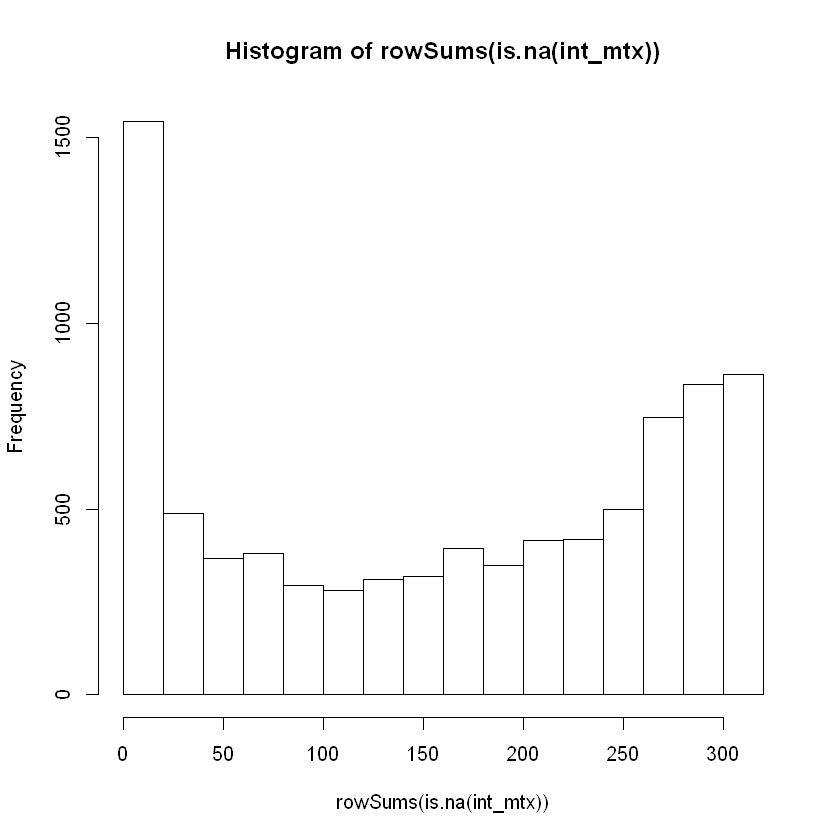

In [34]:
hist(rowSums(is.na(int_mtx)))  # for each gene, how many samples do not have intensity values

In [16]:
min(intensity$Intensity, na.rm = TRUE)

[1] -10.92784

In [37]:
max(intensity$Intensity, na.rm = TRUE)

[1] 28.30615

In [4]:
phos <- read.csv("../proteomics/data/Protein_phos_data.csv")
head(phos)

id,ProteinGroupId,ProteinGroup,PhosLocation_Protein,SingleProtein,Sample,Intensity,Counts,ProteinGroupName,hgnc_symbol
1,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-0464,10.762,1737,TVA40_HUMAN,TRAV40
2,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-0502,12.949,7907,TVA40_HUMAN,TRAV40
3,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-0838,11.048,2117,TVA40_HUMAN,TRAV40
4,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-0852,9.974,1006,TVA40_HUMAN,TRAV40
5,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-1012,14.859,29717,TVA40_HUMAN,TRAV40
6,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-1329,10.467,1415,TVA40_HUMAN,TRAV40


In [49]:
phos_int <- phos %>% 
    select(c('ProteinGroup', 'Sample', 'Counts'))  %>% 
    pivot_wider(names_from = Sample, values_from = Counts, values_fn = mean) %>% 
#     pivot_wider(names_from = Sample, values_from = Intensity) %>% 
    column_to_rownames('ProteinGroup')
head(phos_int)
print(dim(phos_int))

,CTG-0464,CTG-0502,CTG-0838,CTG-0852,CTG-1012,CTG-1329,CTG-1352,CTG-1355,CTG-1360,CTG-1361,...,CTG-3799,CTG-2716,CTG-3064,CTG-3766,CTG-3793,CTG-3794,CTG-3796,CTG-3800,CTG-3801,CTG-3802
sp|A0A0B4J280|TVA40_HUMAN,1737,7907.00,2117.0,1006.0,29717,1415,9002.0,2095.00,9933,17487.00,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0A0B4J2F2|SIK1B_HUMAN;sp|P57059|SIK1_HUMAN,85108,NA,24920.0,NA,19163,NA,28493.0,NA,34998,NA,...,44269.0,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0AV96|RBM47_HUMAN,100790,7691.00,213370.0,158486.0,13950,54956,60515.0,65764.00,NA,99886.00,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0AVK6|E2F8_HUMAN,NA,NA,5379.0,47413.0,48983,NA,13654.0,NA,16613,NA,...,142175.5,57970,7097.0,74606.25,201621.5,117374.0,79821.33,484060.7,296613.3,161540.5
sp|A0AVT1|UBA6_HUMAN,7297,7186.00,10241.0,127135.0,102339,7221,14951.0,NA,5753,11075.00,...,15896.0,6992,17227.5,19014.00,27799.5,32364.5,37154.00,53121.0,21865.0,38245.0
sp|A0FGR8|ESYT2_HUMAN,45663,23800.67,106055.7,124390.3,17854,156255,118950.3,32271.33,17892,64168.33,...,59269.0,60893,4523.0,8164.00,13373.0,9548.0,33364.00,14125.0,NA,29553.0


[1] 5680  209


In [42]:
x <- na.omit(phos_int)
dim(x)

[1] 135 209

In [50]:
# proportion of missin values
sum(is.na(phos_int))/(dim(phos_int)[1] * dim(phos_int)[2])

[1] 0.5555218